In [1]:
import numpy as np
import random 
import math
from operator import itemgetter
from numpy import linspace
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer

In [2]:
from numpy import genfromtxt
my_data = genfromtxt('DEXUSUK.csv', delimiter=',')
min1 = min(my_data)
max1 = max(my_data)
mean = np.mean(my_data)
data = my_data/mean

In [3]:
def data_preprocessing(data, window_size):
    mean = []
    sd = []
    data1 = []
    #print(data)
    for each in range(np.shape(data)[0] - window_size + 1):
        data1.append(data[each + window_size - 1])
        mean.append(np.mean(data[each:each + window_size - 1]))
        sd.append(np.var(data[each:each + window_size - 1]))
    return [data1, mean, sd]

In [4]:
data1, mean1, sd1 = data_preprocessing(data, 5)

In [5]:
"""
LMS function used to update weights
"""
def LMS (error, inp, weight, learning_rate = 0.05):
    return weight + (2 * learning_rate * inp * error)

# Training

In [6]:
errors2 = []
weights = [np.random.randn(), np.random.randn(), np.random.randn()]
iterations = 500
error = 0
variance = 0
mean = 0
actual_value = 0
for each1 in range(1, iterations):
    error = 0
    for each in range(each1 * int(np.shape(data1)[0] * 0.8/iterations), (each1 + 1) * int(np.shape(data1)[0] * 0.8/iterations)):
        actual_value = data1[each]
        mean = mean1[each]
        variance = sd1[each]
        out = weights[0] * actual_value + weights[1] * mean + weights[2] * variance
        error = error + data1[each + 1] - out
    errors2.append(error)
    weights[0] = LMS(error, actual_value, weights[0])
    weights[1] = LMS(error, mean, weights[1])
    weights[2] = LMS(error, variance, weights[2])


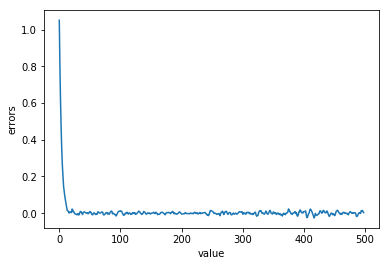

In [7]:
plt.plot(errors2)
plt.ylabel('errors')
plt.xlabel('value')
plt.show()

# Testing

In [8]:
errors = []
for each in range(int(np.shape(data1)[0] * 0.8), np.shape(data1)[0] - 1):
    actual_value = data1[each]
    mean = mean1[each]
    variance = sd1[each]
    out = weights[0] + actual_value + weights[1] * mean + weights[2] * variance
    error = data1[each + 1] - out
    errors.append(error)

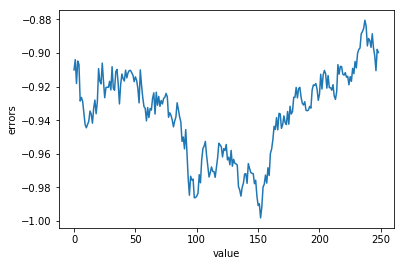

In [9]:
plt.plot(errors)
plt.ylabel('errors')
plt.xlabel('value')
plt.show()